**Import các thư viện cần thiết**

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

**Cho tập dữ liệu danh sách các tài liệu/văn bản trả về từ một truy vấn (q) và tập nhãn các kết quả ở dạng nhị phân như bên dưới, trong đó:**
*   **[1]: tài liệu/văn bản có liên quan đến truy vấn**
*   **[0]: tài liệu/văn bản không có liên quan đến truy vấn**

In [ ]:
# Tập danh sách các tài liệu/văn bản trả về ở dạng các mã định danh
search_results = np.array([599, 588, 611, 788, 871, 982, 863, 623, 567, 898])

# Tập nhãn cho các kết quả trả về ở dạng mã định danh tài liệu/văn bản trong [search_results]
labels = np.array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0])

# Xác định tổng số lượng tài liệu/văn bản thực sự có liên quan đến truy vấn (q) trong hệ thống
total_relevant_docs = 8

**Tương tự như với cách tính Precision/Recall - chúng ta viết lại các hàm [calculate_precision_recall_at] và thêm vào hàm [calculate_f1_score] để tính độ chính xác F1 dựa trên giá trị Precision/Recall được tính trước đó**

**Trong đó F-1 score được xác định như sau:**
## $$F\text{-}1=2.\frac{P.R}{P+R}$$




In [ ]:
# Viết hàm xác định độ chính xác precision/recall của top@k kết quả
def calculate_precision_recall_at(k):
    total_relevant_docs_at_k = len(np.where(labels[:k] == 1)[0])
    precision = total_relevant_docs_at_k / k
    recall = total_relevant_docs_at_k / total_relevant_docs
    return (precision, recall)

# Viết hàm tính độ chính xác F-1 dựa trên precision và recall
def calculate_f1_score(precision, recall):
  f1_score = 2 * (precision * recall) / (precision + recall)
  return f1_score

# Xác định giá trị của khoảng [0, k] mà chúng ta sẽ đánh giá kết quả trả về [search_results] dựa trên nhãn [labels]
eval_range = 10

# Chúng ta tạo 3 danh sách để lưu thông tin precision, recall và f1 tại các vị trí (k)
precisions = []
recalls = []
f1_scores = []

# Tiến hành duyệt qua từng giá trị (k) và tính ra độ chính xác (precision), độ nhậy (recall) và F1 tương ứng
for k in range(1, eval_range + 1):
  (precision, recall) = calculate_precision_recall_at(k)
  # Tính giá trị độ chính xác F1
  f1_score = calculate_f1_score(precision,recall)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1_score)
  print('Top@[{}] - có độ chính xác precison (P): [{:.6f}], recall (R): [{:.6f}], F1: [{:.6f}]'.format(k, precision, recall, f1_score))

Top@[1] - có độ chính xác precison (P): [1.000000], recall (R): [0.125000], F1: [0.222222]
Top@[2] - có độ chính xác precison (P): [1.000000], recall (R): [0.250000], F1: [0.400000]
Top@[3] - có độ chính xác precison (P): [0.666667], recall (R): [0.250000], F1: [0.363636]
Top@[4] - có độ chính xác precison (P): [0.750000], recall (R): [0.375000], F1: [0.500000]
Top@[5] - có độ chính xác precison (P): [0.600000], recall (R): [0.375000], F1: [0.461538]
Top@[6] - có độ chính xác precison (P): [0.666667], recall (R): [0.500000], F1: [0.571429]
Top@[7] - có độ chính xác precison (P): [0.571429], recall (R): [0.500000], F1: [0.533333]
Top@[8] - có độ chính xác precison (P): [0.500000], recall (R): [0.500000], F1: [0.500000]
Top@[9] - có độ chính xác precison (P): [0.555556], recall (R): [0.625000], F1: [0.588235]
Top@[10] - có độ chính xác precison (P): [0.500000], recall (R): [0.625000], F1: [0.555556]


**Chúng ta thử vẽ đồ thị thể hiện sự biến thiên của precision/recall và F1 bằng thư viện matplotlib**

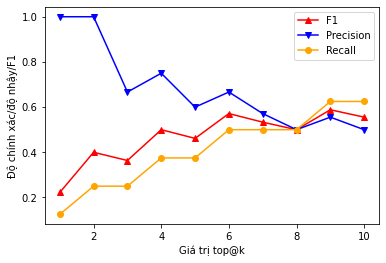

In [ ]:
# Định nghĩa trục (x) - giá trị k: từ 1 -> 10
x_axis = [k for k in range(1, eval_range + 1)]

# Khai báo ghi chú/nhãn cho trục x và trục y
plt.xlabel('Giá trị top@k')
plt.ylabel('Độ chính xác/độ nhậy/F1')

# Định nghĩa đường biến thiên độ đo F1 - màu đỏ (c=r)
plt.plot(x_axis, f1_scores, label='F1', marker='^', c='r')

# Định nghĩa đường biến thiên độ chính xác (precision) - màu xanh (c=b)
plt.plot(x_axis, precisions, label='Precision', marker='v', c='b')

# Định nghĩa đường biến thiên độ nhậy (recall) - màu cam (c=orange)
plt.plot(x_axis, recalls, label='Recall', marker='o', c='orange')

# Hiển thị (labels) và chú thích cho các đường precision/recall trong đồ thị
plt.legend()

# Hiện đồ thị lên màn hình
plt.show()

**Chúng ta viết hàm tính giá trị độ đo E-Measure cho tập kết quả trên dựa trên các giá trị ($\beta$) khác nhau (trong khoảng: [-2,2], và $\beta\neq0$)**

**Ta có công thức tổng quát của E-Measure được xác định như sau:**
## $$E\text{-}Measure=F\text{-}\beta=(1+\beta^{2}).\frac{P.R}{\beta^{2}.P+R}$$

In [ ]:
# Viết hàm tính giá trị E-measure với các giá trị beta khác nhau
def calculate_e_measure(beta, precision, recall):
  e_score = (1+beta**2) * (precision*recall) / ((precision*beta**2)+recall)
  return e_score

# Định nghĩa danh sách các giá trị beta cần đánh giá
betas = []
for beta in range(-2, 3):
  if beta != 0:
    betas.append(beta)
print(f'Danh sách các giá trị betas cần đánh giá: {betas}')

# Cấu trúc dữ liệu dạng dictionary lưu trữ độ chính xác Precision/Recall và E-measure ở các giá trị beta khác nhau
beta_acc_dict = {}

# Duyệt qua từng giá trị của (beta)
for beta in betas:
  print(f'Đánh giá mô hình với beta = [{beta}]')
  # Tiến hành duyệt qua từng giá trị (k) và tính ra độ chính xác (precision), độ nhậy (recall) và E-measure tương ứng
  precisions = []
  recalls = []
  e_scores = []
  for k in range(1, eval_range + 1):
    (precision, recall) = calculate_precision_recall_at(k)
    precisions.append(precision)
    recalls.append(recall)
    # Tính giá trị độ chính xác E-measure
    e_score = calculate_e_measure(beta, precision, recall)
    e_scores.append(e_score)
    print(' - Top@[{}] - có độ chính xác E-measure: [{:.6f}]'.format(k, e_score))
  
  # Lưu trữ lại dữ liệu về độ chính xác tại các giá trị beta khác nhau
  beta_acc_dict[beta] = {
      'P': precisions,
      'R': recalls,
      'E': e_scores
  }

Danh sách các giá trị betas cần đánh giá: [-2, -1, 1, 2]
Đánh giá mô hình với beta = [-2]
 - Top@[1] - có độ chính xác E-measure: [0.151515]
 - Top@[2] - có độ chính xác E-measure: [0.294118]
 - Top@[3] - có độ chính xác E-measure: [0.285714]
 - Top@[4] - có độ chính xác E-measure: [0.416667]
 - Top@[5] - có độ chính xác E-measure: [0.405405]
 - Top@[6] - có độ chính xác E-measure: [0.526316]
 - Top@[7] - có độ chính xác E-measure: [0.512821]
 - Top@[8] - có độ chính xác E-measure: [0.500000]
 - Top@[9] - có độ chính xác E-measure: [0.609756]
 - Top@[10] - có độ chính xác E-measure: [0.595238]
Đánh giá mô hình với beta = [-1]
 - Top@[1] - có độ chính xác E-measure: [0.222222]
 - Top@[2] - có độ chính xác E-measure: [0.400000]
 - Top@[3] - có độ chính xác E-measure: [0.363636]
 - Top@[4] - có độ chính xác E-measure: [0.500000]
 - Top@[5] - có độ chính xác E-measure: [0.461538]
 - Top@[6] - có độ chính xác E-measure: [0.571429]
 - Top@[7] - có độ chính xác E-measure: [0.533333]
 - Top@[8

**Chúng ta thử vẽ biểu đồ thể hiện sự biến thiên của Precision/Recall và E-measure với các giá trị beta khác nhau**

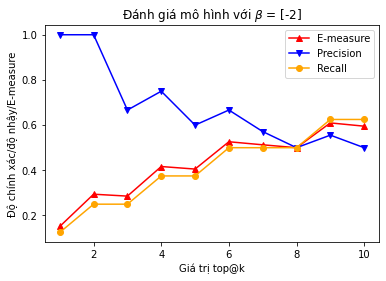

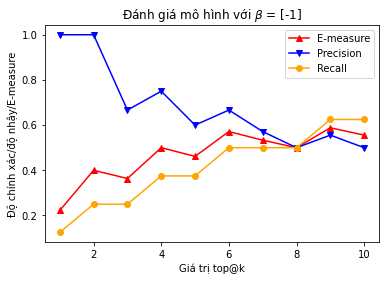

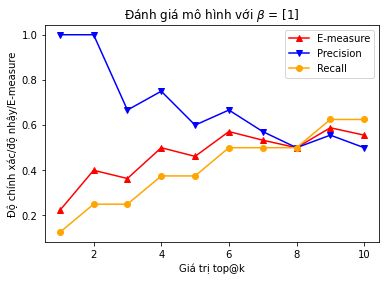

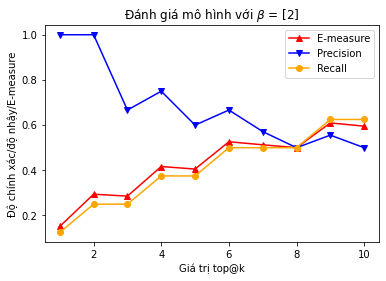

In [ ]:
# Chúng ta viết hàm biểu diễn đồ thị biến thiên của Precision/Recall và E-measure theo beta
def plot_e_measure_by_beta(beta, e_scores, precisions, recalls):

  # Xoá dữ liệu cũ của plot trước
  plt.clf()

  x_axis = [k for k in range(1, eval_range + 1)]
  plt.xlabel('Giá trị top@k')
  plt.ylabel('Độ chính xác/độ nhậy/E-measure')

  # Định nghĩa đường biến thiên độ đo E-measure - màu đỏ (c=r)
  plt.plot(x_axis, e_scores, label='E-measure', marker='^', c='r')

  # Định nghĩa đường biến thiên độ chính xác (precision) - màu xanh (c=b)
  plt.plot(x_axis, precisions, label='Precision', marker='v', c='b')

  # Định nghĩa đường biến thiên độ nhậy (recall) - màu cam (c=orange)
  plt.plot(x_axis, recalls, label='Recall', marker='o', c='orange')
  plt.legend()

  # Định nghĩa thông tin tiêu đề cho đồ thị - thông tin về beta
  plt.title(r'Đánh giá mô hình với $\beta$ = [{}]'.format(beta))

  plt.show()

# Duyệt qua tập dữ liệu tại các giá trị beta khác nhau
for beta in beta_acc_dict.keys():
  e_scores = beta_acc_dict[beta]['E']
  precisions = beta_acc_dict[beta]['P']
  recalls = beta_acc_dict[beta]['R']
  plot_e_measure_by_beta(beta, e_scores, precisions, recalls)